<a href="https://colab.research.google.com/github/Sammy-Mutua/Week-6-IP/blob/main/Samuel_Mutua_Week_6_Core_Machine_Learning_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Friday: Independent Project - Week 6

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

> A prediction result of a game between team 1 and team 2,   based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).




### b) Defining the Metric for Success
create a models to accurately predict the following based on the team's rank and nature of the tournament;
>i. how many goals the home team scores

>ii. how many goals the away team scores

Perform Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### c) Understanding the context 
The FIFA/Coca-Cola World Ranking is was developed by FIFA and named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

### d) Recording the Experimental Design
In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Expected flow for the assessment:

> i. Perform your EDA

>ii. Perform any necessary feature engineering

>iii. Check of multicollinearity

>iv.   Start building the model

>v.    Cross-validate the model

>vi.  Compute RMSE

>vii. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

3. Perform appropriate regressions on the data including your justification
4. Challenge your solution by providing insights on how you can make improvements. 

### e) Data Relevance
The dataset and glossary to use for this project can be found https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc.

## 2. Reading the Data

In [34]:
# Importing the necessary Libraries
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
import requests
from io import StringIO
import datetime as dt
%matplotlib inline


In [35]:
# Loading the Dataset
df1 = pd.read_csv('fifa_ranking.csv')
df2 = pd.read_csv('results.csv')


## 3. Checking the Data

In [36]:
# Checking the first 5 records
df1.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [37]:
# Checking the last 5 records
df1.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [39]:
# Checking the number of Entries in our data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [40]:
# Checking some statistical summaries of the fifa ranking dataset
df1.describe()


,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [41]:
#Checking for Null Values
df1.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [42]:
# Checking for Duplicates
df1.duplicated().any()

True

In [43]:
# Dropping the duplicates where found
df1.drop_duplicates(keep='first', inplace = True)

In [44]:
# Confirming removal of duplicates
df1.duplicated().any()

False

In [45]:
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [46]:
df2.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [48]:
df2.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [49]:
df2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [50]:
df1.duplicated().any()

False

## 4. Tidying the Dataset

In [51]:
# Renaming the rank date column in the fifa_ranking dataset
df1.rank_date = df1.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [52]:
# Making the date columns in both tables uniform
#
df1.date = df1.date.apply(lambda x: x.replace('/', '-'))
df2.date = df2.date.apply(lambda x: x.replace('/', '-'))

In [53]:
# Changing the date columns to datetime objects
#
df1.date = pd.to_datetime(df1.date)
df2.date = pd.to_datetime(df2.date)

# Creating a year and month column from the datetime object
#
df1['year'] = df1.date.dt.year
df2['year'] = df2.date.dt.year

df1['month'] = df1.date.dt.month
df2['month'] = df2.date.dt.month

In [54]:
# Checking for unique values in the year column of the fifa ranking dataset
df1.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [55]:
# Checking for unique values in the year column of the Results dataset
df2.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [56]:
# Merging the two dataframes
df3= pd.merge(df2, df1, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
df3.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4310886 entries, 0 to 4310885
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   date_x                   datetime64[ns]
 1   home_team                object        
 2   away_team                object        
 3   home_score               int64         
 4   away_score               int64         
 5   tournament               object        
 6   city                     object        
 7   country                  object        
 8   neutral                  bool          
 9   year                     int64         
 10  month                    int64         
 11  rank                     float64       
 12  country_full             object        
 13  country_abrv             object        
 14  total_points             float64       
 15  previous_points          float64       
 16  rank_change              float64       
 17  cur_year_avg             fl

## 5. Exploratory Analysis

In [60]:
#Selecting the ranking details of the home team only
#
home_data = df3[df3.home_team == df3.country_full]
#previewing the first five rows of the home_data dataframe
#
home_data.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
17928,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18146,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18265,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18504,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18635,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [61]:
# Getting the columns to be renamed
#
home_data.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [62]:
# Renaming the selected home_combined columns using a for loop
# 
for x, y in zip(home_data.columns[11:-2], home_data.columns[11:-2]):
  home_data.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
home_data.columns[11:-2]

Index(['rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home'],
      dtype='object')

In [64]:
# Selecting the ranking details of the away team only
#
away_data = df3[df3.away_team == df3.country_full]
#previewing the first five rows of the away_data dataframe
#
away_data.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
17976,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18081,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18278,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18418,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18602,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [65]:
 # Getting the columns to be renamed in the away_data dataframe
#
away_data.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [66]:
# Renaming the selected away_combined columns using a for loop
# 
for x, y in zip(away_data.columns[11:-2], away_data.columns[11:-2]):
  away_data.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
away_data.columns[11:-2]

Index(['rank_away', 'country_full_away', 'country_abrv_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away'],
      dtype='object')

In [67]:
# Selecting only the relevant columns in the away dataframe
# Creating a list of relevant columns
#
relevant_cols = list(away_data.columns[9:-2])
relevant_cols.extend(['home_team', 'away_team'])

away_data = away_data[relevant_cols]

# Previewing the first two columns of the away dataset
#
away_data.head()

,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team
17976,1993,8,67.0,Paraguay,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Colombia,Paraguay
18081,1993,8,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peru,Argentina
18278,1993,8,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Uruguay,Ecuador
18418,1993,8,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Venezuela,Brazil
18602,1993,8,25.0,Zambia,ZAM,0.0,38.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senegal,Zambia


In [68]:
#Merging the home_combined dataframe to the away_combined dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns
#
final = pd.merge(home_data, away_data, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Previewing the first five rows of the merged dataframe
final.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,...,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,...,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,...,38.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Removing irrelevant columns from the final dataframe
# Creating a list of columns to be dropped
#
drop_cols = ['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away']
final.drop(drop_cols, axis = 1, inplace = True)

In [70]:
# Checking for missing values
# This is because a left join was used and some countries in the result dataframe are not ranked.
#
final.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1773
total_points_away               1773
previous_points_away            1773
r

In [71]:
# Dropping missing values
#
final.dropna(inplace=True)

In [72]:
# Creating a copy of the final_df for later usage
#
new= final.copy()

In [73]:
#Previewing the first five rows of the engineered dataframe
#
new.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,...,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,...,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,...,38.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# we are going to use the information from Country, Rank, City, Home Team, Away Team, Home Score,Away Score, Confederation, Neutral and Tournament for the EDA.
new.shape

(17632, 36)

In [82]:
# Creating a new column showing the final result
# The column has been created by subtracting the away score from the home score
# zero goals means a draw
# Positive goals means the home team won
# Negative goals means the away team won, which means that the home team lost.
#
new['score'] = new.home_score - new.away_score

In [83]:
# Previewing the first five rows of the score column
#
new.score.head()

0    0
1   -1
2    0
3   -4
4    0
Name: score, dtype: int64

In [80]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
new['result'] = new.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
#
new.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored
#
new['total_goals'] = new.home_score + new.away_score

# Previewing the last five rows of the dataframe together with the result column
#
new.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lose,1
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lose,6
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,0


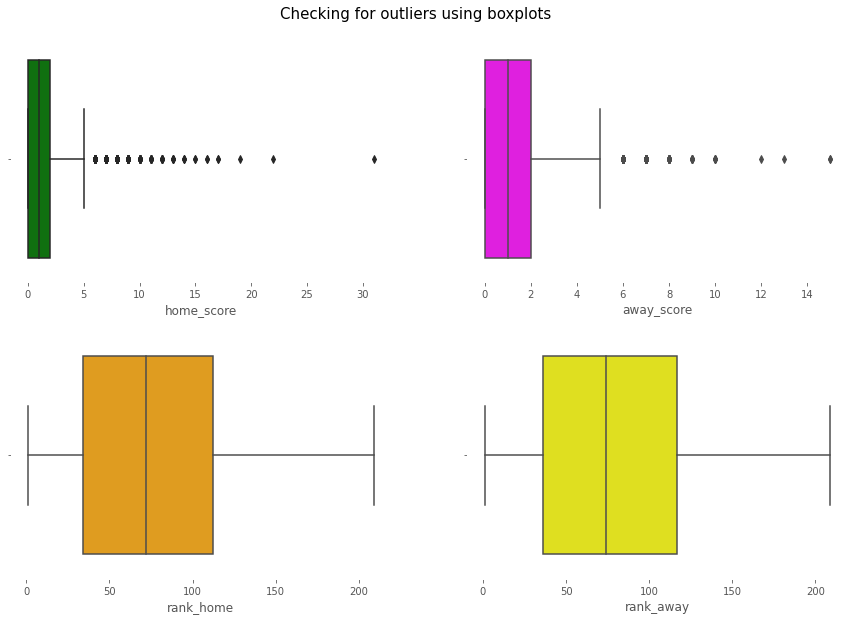

In [85]:
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'rank_home', 'rank_away']
colors = ['green', 'magenta', 'orange', 'yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), new, col_list, colors):
  sns.boxplot(new[column], ax = ax, color = color)
  ax.set_facecolor('white') # Setting the background color to white

From the above boxplots, it can be seen that both the home score and away score columns have outliers. The outliers are important for modelling, so they will not be dropped



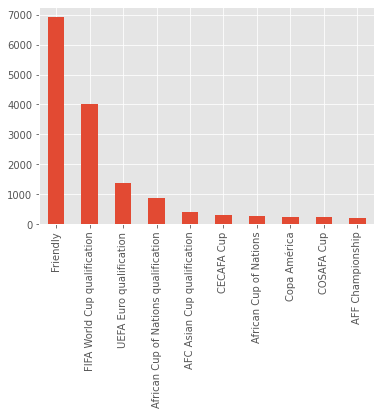

In [86]:
#Plotting a bar graph of tournament

new['tournament'].value_counts().head(10).plot.bar();

From the bar graph above we can see that majority of the games played were friendly



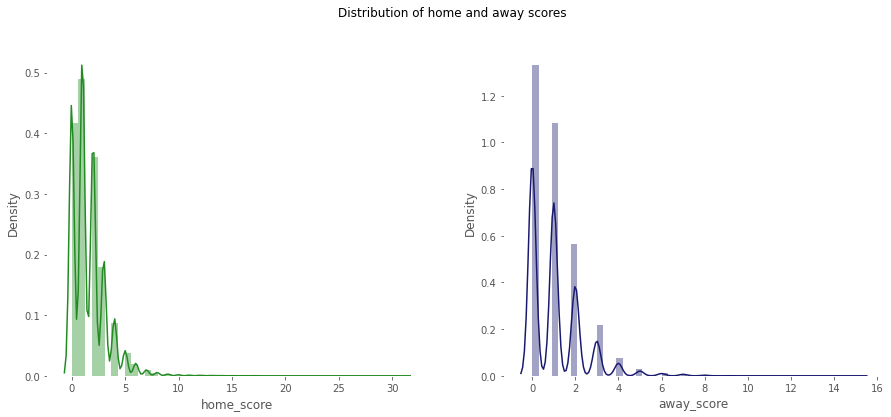

In [95]:
# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6));
plt.suptitle('Distribution of home and away scores');
for ax, data, column, color in zip(axes.flatten(), new, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(new[column], ax = ax, hist = True, color = color);
  ax.set_facecolor('white');

from our observation , our data is highly skewed to the right

## 6. Implementing the Solution

Polynomial Regression

In [96]:
# Selecting columns relevant to the reasearch question
#
dataset = new[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'rank_home', 'rank_away']]

# Previewing the first five rows of the dataset
#
dataset.head()


,home_team,away_team,home_score,away_score,tournament,rank_home,rank_away
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,19.0,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,70.0,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,22.0,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,94.0,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,58.0,25.0


>Checking for multicollinearity

Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1

In [97]:
# Displaying the correlations between the variables
#
corrs = dataset.drop('home_score', axis = 1).corr()
corrs

,away_score,rank_home,rank_away
away_score,1.000000,0.215251,-0.182331
rank_home,0.215251,1.000000,0.475723
rank_away,-0.182331,0.475723,1.000000


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.



In [98]:
# Creating a dataframe of the VIF
#
vif_new = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_new

,away_score,rank_home,rank_away
away_score,1.178022,-0.459812,0.433533
rank_home,-0.459812,1.471987,-0.784096
rank_away,0.433533,-0.784096,1.452059


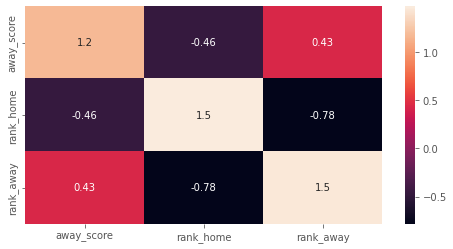

In [100]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (8, 4))
sns.heatmap(vif_new, annot = True)
plt.show()

The VIF score for each variable is found alongside the downwards sloping diagonal. away_score has a score of approximately 1.2, rank_away has a score of approximately 1.5 and rank_away has a score of approximately 1.5. All of this scores are under 5, therefore there is no multicollinearity

Creating the Model

In [101]:
# Creating X and y variables
#
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6]]
y = dataset.home_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3797793719607754


A lower RMSE of a model suggests better performance of the model. Therefore, this model is fairly good in making predictions



Finding optimal values for our model via use of Hyperparameter tuning

In [103]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -1.8827643556683813 and the best parameters are {'fit_intercept': True, 'normalize': False}


Checking for Underfitting and Overfitting by means of cross validation

In [104]:
# Performing cross validation of ten folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 1.883
Standard deviation of the cross validation scores is 0.262


The mean and standard deviation suggest that the model is fairly stable, as it varies only by 0.26, from the mean



Checking for Appropriateness via means of residual plots

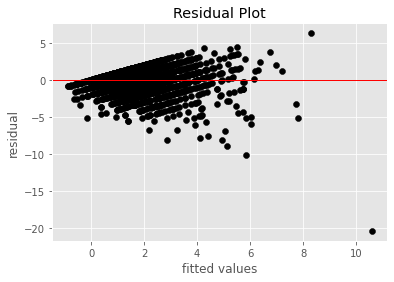

In [105]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are centered around a mean that is approximately close to zero, suggesting a fairly good model.
A few outliers are observed

Test for Heteroskedasticity

The concept of heteroscedasticity - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

The barlett'stest establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [106]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 571.92 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


LOGICAL REGRESSION

In [111]:
# Selecting the relevant features for the logistic regression model
#
data = new[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19.0,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70.0,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22.0,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94.0,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58.0,25.0,Draw


In [113]:
# Spliting the data into features and the target variable
#
X = data.drop('result', axis = 1)
y = data.result

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Model accuracy is {accuracy_score(y_test, y_pred)}')
print(f'f1 score of the model is {f1_score(y_test, y_pred, average = "macro")}')
confusion_matrix(y_test, y_pred)

Model accuracy is 0.8756805807622504
f1 score of the model is 0.8510504606953783


array([[ 802,   40,  155],
       [ 273,  970,    0],
       [  80,    0, 2088]])

the observations above suggests that the model is almost overfitting. Further investigation is needed.

Hyperparameter Tuning

In [115]:
# Creating a dictioanry of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 0.8810111603726384 and the best parameters are {'C': 5.0, 'penalty': 'l2'}


## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.




